# FML Homework 5 - Erin Choi

## Data Preprocessing

In [210]:
# import packages - general
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from IPython.display import clear_output
from sklearn import metrics
import time, math, random

# preprocessing
from sklearn.preprocessing import StandardScaler 

# dimension reduction methods
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE, MDS

# clustering methods
from sklearn import cluster
from sklearn.cluster import KMeans, DBSCAN
from sklearn.metrics import silhouette_score

In [2]:
# set a seed
seed = 42
random.seed(seed)
np.random.seed(seed)

In [4]:
# import the data
data = pd.read_csv('wines.csv', encoding='utf-8')
data.head()

,Alcohol,Malic_Acid,Ash,Ash_Alkalinity,Magnesium,Total_Phenols,Flavonoids,Stilbenes,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [6]:
data.shape

(178, 13)

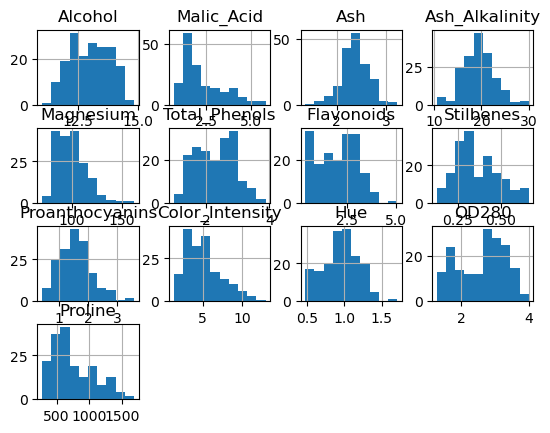

In [27]:
# observe distributions of features
data.hist();

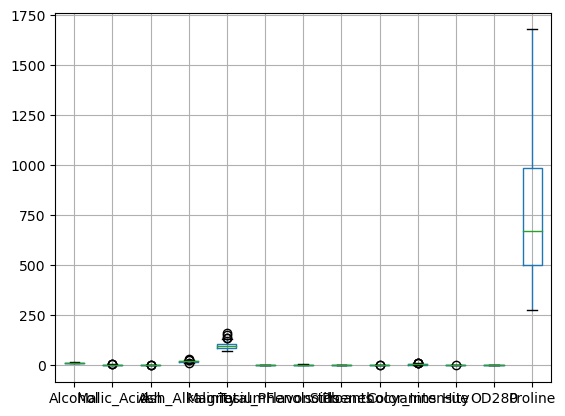

In [28]:
data.boxplot();
# data.iloc[:,:4].boxplot();
# data.iloc[:,6:12].boxplot();

In [42]:
# standardize the data
scaled_data = StandardScaler().fit_transform(data)
scaled_data = pd.DataFrame(scaled_data, columns=data.columns)

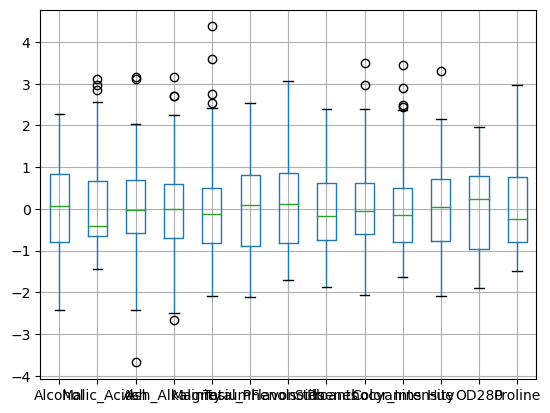

In [43]:
scaled_data.boxplot();

## Question 1
**Do a PCA on the data. How many Eigenvalues are above 1? Plotting the 2D solution (projecting the data on the first 2 principal components), how much of the variance is explained by these two dimensions, and how would you interpret them?**

In [44]:
# run sklearn pca
pca = PCA(whiten=True, random_state=42).fit(scaled_data) 
scaled_data_pca = pca.transform(scaled_data)

In [47]:
eigvals = pca.explained_variance_
len(eigvals)

13

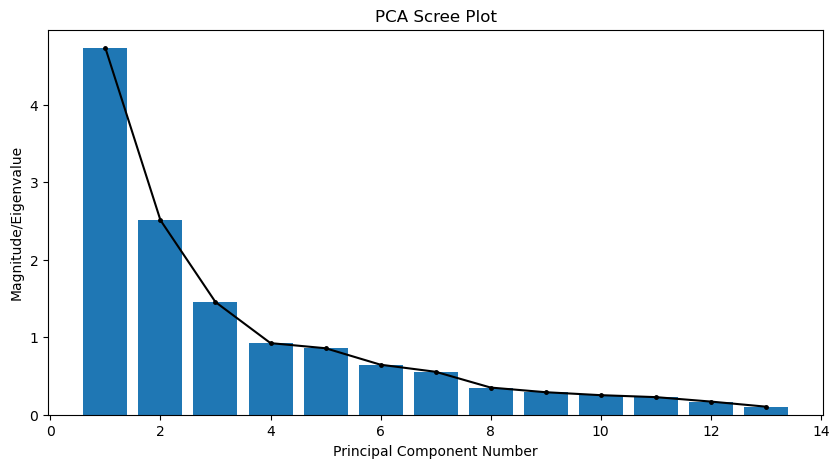

In [55]:
# scree plot
plt.figure(figsize=(10, 5))
plt.bar(range(1,14), eigvals)
plt.plot(range(1,14), eigvals, color='black', marker='.', markersize=5)
plt.title('PCA Scree Plot')
plt.xlabel('Principal Component Number')
plt.ylabel('Magnitude/Eigenvalue')
plt.show()

In [59]:
# eigenvalues above 1:
print("Number of Eigenvalues above 1:", len(eigvals[eigvals>1]))

Number of Eigenvalues above 1: 3


In [295]:
eigvals[:3]

array([4.73243698, 2.51108093, 1.45424187])

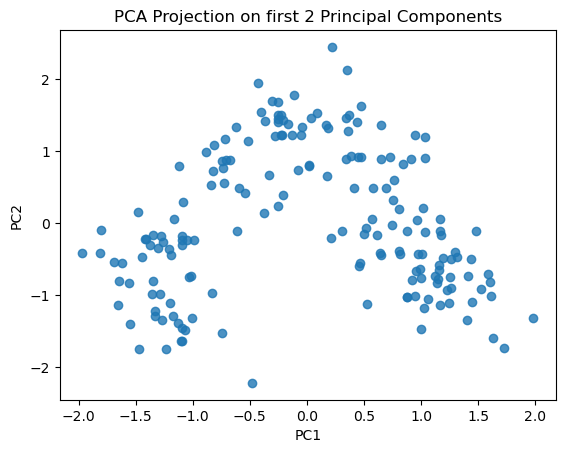

In [60]:
# plot projection on first 2 PCs - 2 dimensional
plt.scatter(scaled_data_pca[:, 0], scaled_data_pca[:, 1], alpha=0.8)
plt.title("PCA Projection on first 2 Principal Components")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.show()

In [296]:
# variance explained by pc1 and pc2 projection
print("Variance explained by PC1:", pca.explained_variance_ratio_[0])
print("Variance explained by PC2:", pca.explained_variance_ratio_[1])
print("Variance explained by PC3:", pca.explained_variance_ratio_[2])
print("Variance explained by the 2 dimensional projection:", pca.explained_variance_ratio_[:2].sum())

Variance explained by PC1: 0.3619884809992636
Variance explained by PC2: 0.19207490257008966
Variance explained by PC3: 0.11123630536249945
Variance explained by the 2 dimensional projection: 0.5540633835693533


In [72]:
# interpreting the dimensions:
# view how important each feature is to pc1, pc2
pc_components = pd.DataFrame(pca.components_, columns = scaled_data.columns)
pc_components[:2]

,Alcohol,Malic_Acid,Ash,Ash_Alkalinity,Magnesium,Total_Phenols,Flavonoids,Stilbenes,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
0,0.144329,-0.245188,-0.002051,-0.239320,0.141992,0.394661,0.422934,-0.298533,0.313429,-0.088617,0.296715,0.376167,0.286752
1,-0.483652,-0.224931,-0.316069,0.010591,-0.299634,-0.065040,0.003360,-0.028779,-0.039302,-0.529996,0.279235,0.164496,-0.364903


In [88]:
# PC1 components
pc1_comp = pc_components.iloc[0].sort_values(key=abs, ascending=False)
pc1_comp

Flavonoids         0.422934
Total_Phenols      0.394661
OD280              0.376167
Proanthocyanins    0.313429
Stilbenes         -0.298533
Hue                0.296715
Proline            0.286752
Malic_Acid        -0.245188
Ash_Alkalinity    -0.239320
Alcohol            0.144329
Magnesium          0.141992
Color_Intensity   -0.088617
Ash               -0.002051
Name: 0, dtype: float64

In [89]:
# PC2 components
pc2_comp = pc_components.iloc[1].sort_values(key=abs, ascending=False)
pc2_comp

Color_Intensity   -0.529996
Alcohol           -0.483652
Proline           -0.364903
Ash               -0.316069
Magnesium         -0.299634
Hue                0.279235
Malic_Acid        -0.224931
OD280              0.164496
Total_Phenols     -0.065040
Proanthocyanins   -0.039302
Stilbenes         -0.028779
Ash_Alkalinity     0.010591
Flavonoids         0.003360
Name: 1, dtype: float64

In [297]:
print("Most important features in PC1:", pc1_comp[:4].index.values)
print("Most important features in PC2:", pc2_comp[:4].index.values)

Most important features in PC1: ['Flavonoids' 'Total_Phenols' 'OD280' 'Proanthocyanins']
Most important features in PC2: ['Color_Intensity' 'Alcohol' 'Proline' 'Ash']


## Question 2
**Use t-SNE on the data. How does KL-divergence depend on Perplexity (vary Perplexity from 5 to 150)? Make sure to plot this relationship. Also, show a plot of the 2D component with a Perplexity of 20.**

In [116]:
# compute kl-divergence by varying perplexity 5-150
perp = np.arange(5,151)
kldiv = []

# loop tsne
for i in perp:
    tsne = TSNE(perplexity=i, n_jobs=-1, random_state=42)
    data_embedded = tsne.fit_transform(scaled_data)
    
    # save result for perplexity 19
    if i==19:
        data_tsne_p19 = data_embedded.copy()
    # save result for perplexity 20
    if i==20:
        data_tsne_p20 = data_embedded.copy() 
    # save result for perplexity 21
    if i==21:
        data_tsne_p21 = data_embedded.copy()
        
    kldiv.append(tsne.kl_divergence_)
    clear_output(wait=True)
    print("Perplexity:", i, "| KL-Divergence:", tsne.kl_divergence_)

Perplexity: 150 | KL-Divergence: 0.02612496167421341


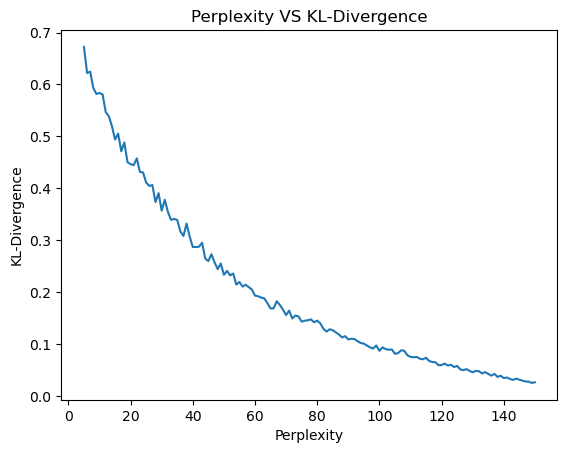

In [117]:
# plot relationship between perplexity & kl-divergence
plt.plot(perp, kldiv)
plt.title("Perplexity VS KL-Divergence")
plt.xlabel("Perplexity")
plt.ylabel("KL-Divergence")
plt.show()

KL-Divergence decreases overall and approaches 0 as perplexity increases.

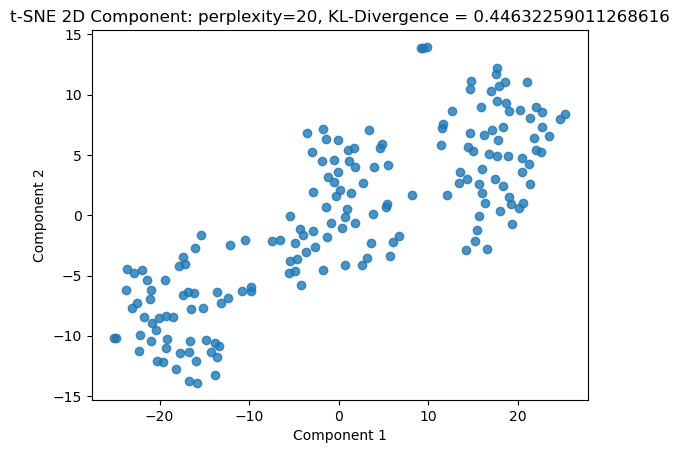

In [118]:
# plot 2D component with perplexity=20
plt.scatter(data_tsne_p20[:, 0], data_tsne_p20[:, 1], alpha=0.8)
plt.title("t-SNE 2D Component: perplexity=20, KL-Divergence = "+str(kldiv[15]))
plt.xlabel("Component 1")
plt.ylabel("Component 2")
plt.show()

## Question 3
**Use MDS on the data. Try a 2-dimensional embedding. What is the resulting stress of this embedding? Also, plot this solution and comment on how it compares to t-SNE.**

In [155]:
# MDS, 2-dim embedding
mds = MDS(n_components=2, n_init=100, max_iter=10000, 
          dissimilarity='euclidean', normalized_stress='auto',
          n_jobs=-1, random_state=42)
data_mds = mds.fit_transform(scaled_data)

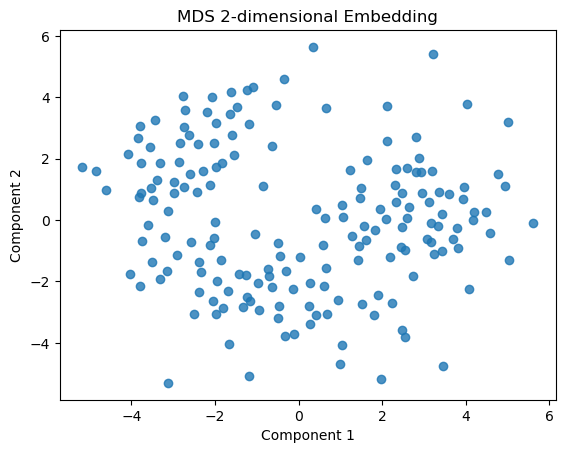

In [161]:
# plot the 2-dim embedding solution
plt.scatter(data_mds[:, 0], data_mds[:, 1], alpha=0.8)
plt.title("MDS 2-dimensional Embedding")
plt.xlabel("Component 1")
plt.ylabel("Component 2")
plt.show()

In [303]:
print("Stress:", mds.stress_)
print("Normalized Stress:", mds.stress_/sum(sum(mds.dissimilarity_matrix_)))

Stress: 21105.54822647635
Normalized Stress: 0.13653692500693435


## Question 4
**Building on one of the dimensionality reduction methods above that yielded a 2D solution (1-3, your choice), use the Silhouette method to determine the optimal number of clusters and then use kMeans with that number (k) to produce a plot that represents each wine as a dot in a 2D space in the color of its cluster. What is the total sum of the distance of all points to their respective clusters centers, of this solution?**

Using the t-SNE solution.

In [171]:
# keep track of silhouettes
silhouettes = np.zeros(len(scaled_data)) #178 data points

# kmeans for 2-178 clusters
for k in range(2, len(scaled_data) - 1):
    kmeans = KMeans(k, n_init='auto', random_state=42)
    labels = kmeans.fit_predict(scaled_data)
    silhouettes[k-1] = silhouette_score(scaled_data, labels)

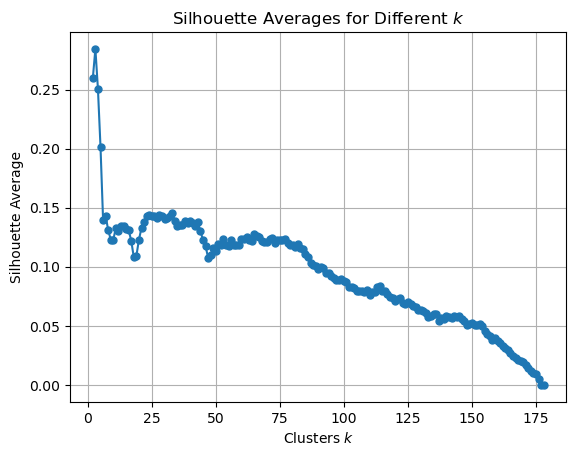

In [178]:
# plot silhouette scores
plt.plot(np.arange(2, len(scaled_data)+1, 1), silhouettes[1:], marker='o', markersize=5)
plt.xlabel('Clusters $k$')
plt.ylabel('Silhouette Average')
plt.title('Silhouette Averages for Different $k$')
plt.grid()
plt.show()

The peak of silhouette scores is at the second point on the plot. Since silhouette scores were calculated beginning with 2 clusters, the optimal number of number of clusters $k$ is 3.

In [179]:
# kmeans using 3 clusters
kmeans = KMeans(3, n_init='auto', random_state=42)

In [184]:
# predict labels
km_label = kmeans.fit_predict(data_tsne_p20)
unique_km_labels = np.unique(km_label)

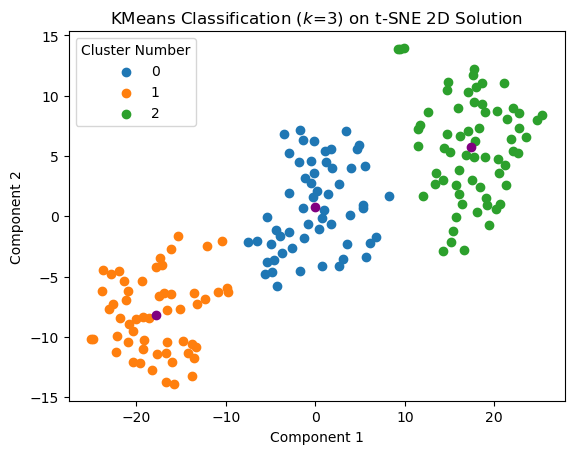

In [309]:
# plot clusters in different colors
for i in unique_km_labels:
    plt.scatter(data_tsne_p20[km_label == i, 0],  
                data_tsne_p20[km_label == i, 1], 
                label=i)
    plt.scatter(kmeans.cluster_centers_[i, 0],
                kmeans.cluster_centers_[i, 1],
                color='purple')
plt.title("KMeans Classification ($k$=3) on t-SNE 2D Solution")
plt.xlabel("Component 1")
plt.ylabel("Component 2")
plt.legend(title="Cluster Number")
plt.show()

In [200]:
# where are the cluster centers?
kmeans.cluster_centers_

array([[-1.1438131e-02,  7.3552132e-01],
       [-1.7751286e+01, -8.1632748e+00],
       [ 1.7432735e+01,  5.7445936e+00]], dtype=float32)

In [202]:
# find total sum of the distances of all points to 
# their respective cluster centers -

# each point's distances to each cluster centers
km_dist = kmeans.transform(data_tsne_p20)

In [208]:
# each point's distance from its own cluster center
# = the minimum of distances to each center
# find this minimum distance for each point
km_dist_to_center = []
for p in np.arange(0, len(km_dist)):
    km_dist_to_center.append(min(km_dist[p]))

# sum of distances
total_dist = sum(km_dist_to_center)
print("The sum of the distances of all points to their cluster centers is:", total_dist)

The sum of the distances of all points to their cluster centers is: 861.6483865380287


In [311]:
print("The average distance of each point from its cluster center is:", 
      total_dist/len(scaled_data))

The average distance of each point from its cluster center is: 4.840721272685554


## Question 5
**Building on one of the dimensionality reduction methods above that yielded a 2D solution (1-3, your choice), use dBScan to produce a plot that represents each wine as a dot in a 2D space in the color of its cluster. Make sure to suitably pick the radius of the perimeter (“epsilon”) and the minimal number of points within the perimeter to form a cluster (“minPoints”) and comment on your choice of these two hyperparameters.?**

Using the t-SNE solution.

In [289]:
# use dbscan

# try different eps: 1-4
# eps >= 4 clusters almost all points together
# eps < 3 makes too many clusters

# try diff min_samples: 1-5
# min_samples >= 5 classifies more points as outliers, 
# < 3 makes fewer clusters & outliers become their own cluster

db = DBSCAN(eps=3, min_samples=4)
db_model = db.fit(data_tsne_p20)

In [290]:
# get labels
db_label = db_model.labels_
unique_db_labels = np.unique(db_label)
unique_db_labels

array([-1,  0,  1,  2])

In [314]:
# get indices of core points 
core_pts = db.core_sample_indices_

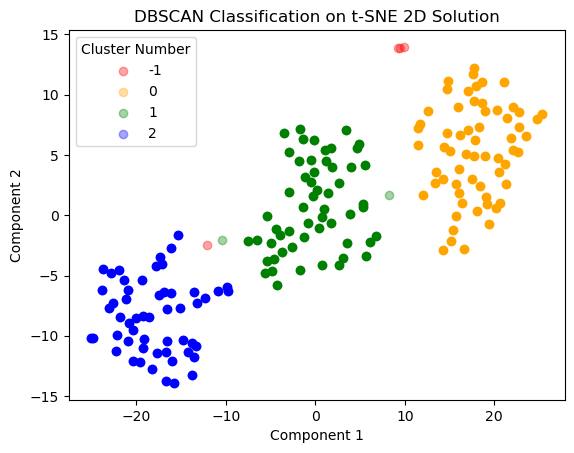

In [326]:
# plot clusters in different colors
colors = ['orange', 'green', 'blue', 'red']

for i in unique_db_labels:
    plt.scatter(data_tsne_p20[db_label == i, 0],  
                data_tsne_p20[db_label == i, 1], 
                label=i, alpha = 0.35, color=colors[i])
    
    # core points
    for j in data_tsne_p20[db_label==i]:
        pos = np.where(data_tsne_p20==j)[0][0]
        if pos in core_pts:
            plt.scatter(j[0], j[1], alpha=1.0, color=colors[i])
            
plt.title("DBSCAN Classification on t-SNE 2D Solution")
plt.xlabel("Component 1")
plt.ylabel("Component 2")
plt.legend(title="Cluster Number")
plt.show()

## Extra Credit: Part A
**Given your answers to all of these questions taken together, how many different kinds of wine do you think there are and how do they differ?**

In [292]:
# 3 clusters & 1 set of outliers from DBSCAN
# add labels to data
data['label'] = db_label
data.head()

,Alcohol,Malic_Acid,Ash,Ash_Alkalinity,Magnesium,Total_Phenols,Flavonoids,Stilbenes,Proanthocyanins,Color_Intensity,Hue,OD280,Proline,label
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065,0
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050,0
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185,0
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480,0
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735,0


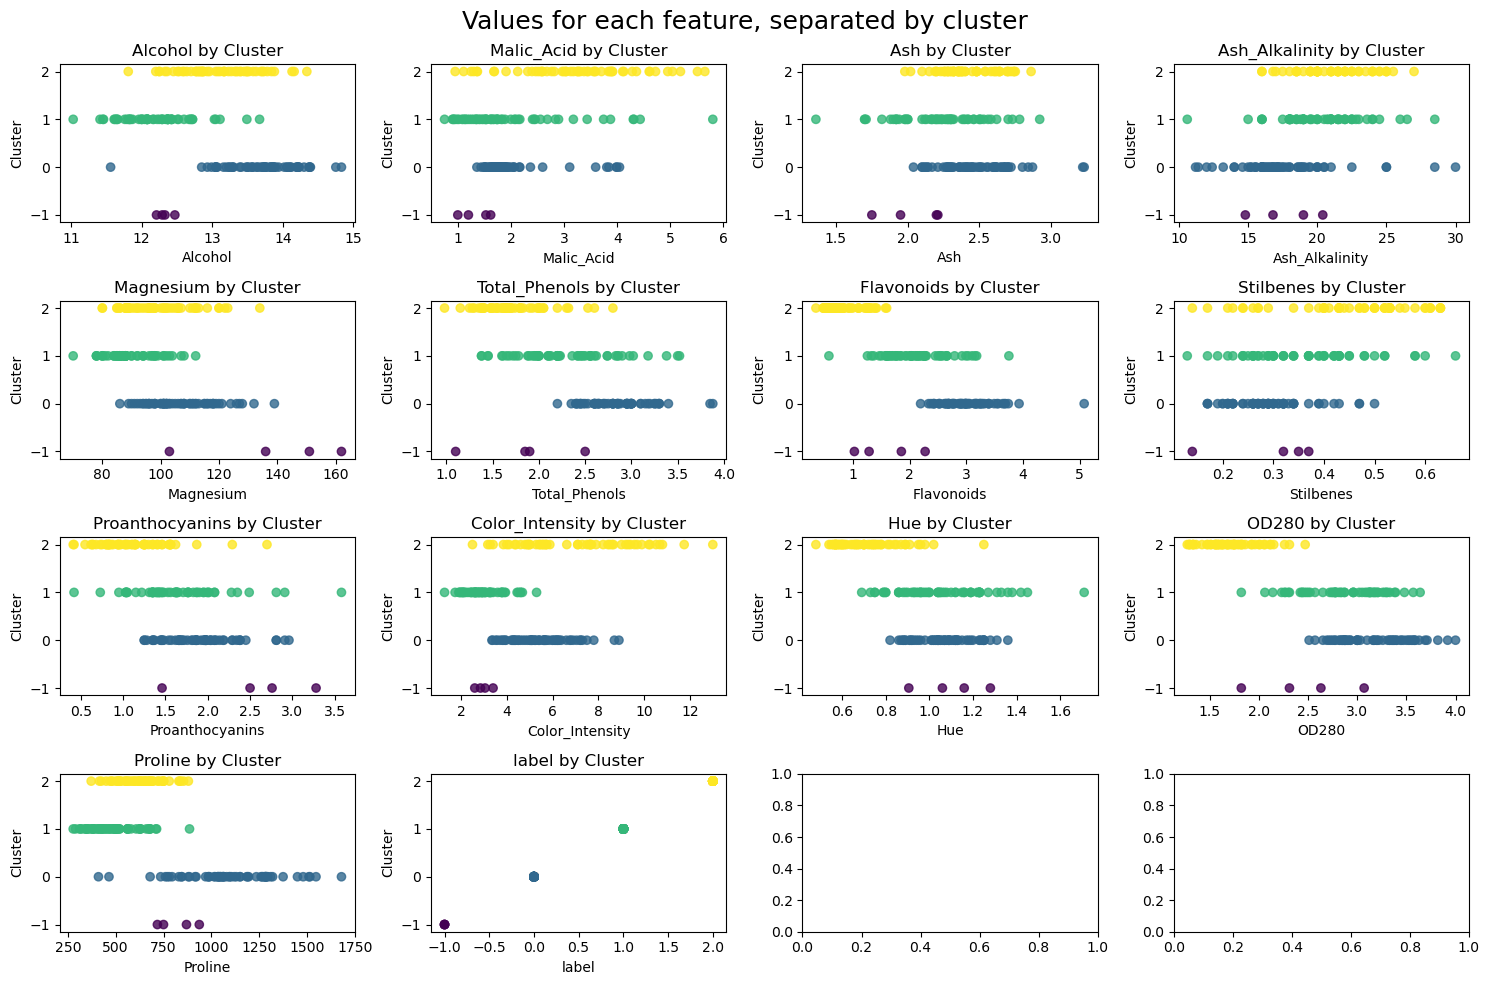

In [293]:
# plot values for each feature based on cluster

# create figure with 16 subplots
fig, axis = plt.subplots(4, 4, figsize=(15,10))
fig.suptitle("Values for each feature, separated by cluster", fontsize=18)

# iterate through axes and graph one feature's values on each plot
# label plot for only one feature (last one) to be used for the legend
colnum = 0
for i in range(4):
    for j in range(4):
        axis[i,j].scatter(data[data.columns[colnum]], data['label'], c = data['label'], alpha=0.8)
        axis[i,j].set_title(data.columns[colnum]+" by Cluster")
        axis[i,j].set_xlabel(data.columns[colnum])
        axis[i,j].set_ylabel("Cluster")     
        colnum += 1
        if colnum==14:
            break
plt.tight_layout()
plt.show()

Red, white, sparkling?

## Extra Credit: Part B
**Is there anything of interest you learned about wines from exploring this dataset with
unsupervised machine learning method that is worth noting and not already covered in the questions above?**

Also using code from part A.